#**Lead Scoring Case Study** 

##**Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

##**Goals of the Case Study**
There are quite a few goals for this case study.

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [217]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [218]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###Step 1: Importing and Understanding the dataset

In [219]:
#reading the dataset
leads=pd.read_csv('Leads.csv',encoding='utf-8',engine='python')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [220]:
#shape of dataset

leads.shape

(9240, 37)

We have 37 columns and 9240 rows of data

In [221]:
#column information of the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are 7 numeric variables and 30 categorical variables

In [222]:
#Let's describe the data and get a statistical understanding of the data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As we can see, TotalVisits, TotalTimeSpentOnWebsite and PageViewsPerVisit have outliers which we will treat after data cleaning

####**Cleaning the Dataset**

In [223]:
#Dropping the redundant columns which are not of use to the analysis
#Prospect ID, Lead Number, City, Country, I agree to pay the amount through cheque , A free copy of Mastering The Interview
redcol=['Prospect ID','Lead Number','City','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
leads=leads.drop(redcol,axis=1)

In [224]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


Some columns have 'Select' as a value. This has happened because the user has not selected any option on the web form and it has been processed by the system as 'Select'. Let's impute the select as Null or NaN for analysis.

In [225]:
#replacing the Select with NaN

leads=leads.replace('Select',np.NaN) #replace all the Select with NaN
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,02.Medium,01.High,15.0,18.0,Modified


In [226]:
#Check for missing values

leads.isnull().sum()/len(leads)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

**9** columns have **missing values greater than 30%**. It is not a good idea to impute columns with missing values greater than 30%. So we will **drop these 9 columns**

In [227]:
#dropping the 9 columns
missing_val_cols=['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
leads=leads.drop(missing_val_cols,axis=1)


In [228]:
#again check missing values percentage on columns
leads.isnull().sum()/len(leads)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

For columns with less than **30% percent missing values**, we will **impute using maximum occurence of a value** for a particular column i.e (Lead Source, TotalVisits, Page View Per Visits, Last Activity,What is your current occupation,What matters most to you in choosing a course )

In [229]:
#For each missing value column, we will find the missing or NaN value and impute it with the most occuring value 

#let's define a lambda function to avoid manually processing each column

leads=leads.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [230]:
#Let's check the missing values again
leads.isnull().sum()/len(leads)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses        

In [231]:
#let's check the imputed columns
leads['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

Notice that Google and google have two seperate entries because of upper and lower case. Let's fix using capitalize and standardize the values

In [232]:
#applying a lambda function to make a Proper case or capitalize case

leads['Lead Source']= leads['Lead Source'].apply(lambda x:x.capitalize())

#check the column again
leads['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Press_release           2
Social media            2
Live chat               2
Welearnblog_home        1
Blog                    1
Youtubechannel          1
Nc_edm                  1
Welearn                 1
Pay per click ads       1
Testone                 1
Name: Lead Source, dtype: int64

In [233]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened
3,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified


The Data looks clean and in good shape.Let's apply tranformation to the categorical columns.

####**Data Transformation**

Assigning numerical values to Yes/No categorical columns

In [234]:
#Let's apply a replace function to replace Yes with '1' and No with '0'

In [235]:
leads=leads.replace("Yes",1)
leads=leads.replace("No",0)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened
3,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified


In [236]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   What is your current occupation                9240 

Creating dummy variables for the 8 categorical columns and dropping the first level

In [237]:
#creating list of categorical variables
dummy_var=['Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']
dummies=pd.get_dummies(leads[dummy_var],drop_first=True)

In [238]:
#add the dummy to the original dataframe
leads=pd.concat([leads,dummies],axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,...,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [239]:
#drop the original columns for which dummies were created.

leads=leads.drop(dummy_var,1)
leads.shape

(9240, 77)

In [240]:
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [241]:
#drop other redundant columns
redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

leads=leads.drop(redundant,1)

In [242]:
leads.shape

(9240, 73)

In [243]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

####**Check for Outliers**

In [244]:
round(leads.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.0,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.08,0.01,0.00,0.00,0.00,0.28,0.01,0.31,0.00,0.00,0.19,0.12,0.00,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.04,0.03,0.00,0.38,0.00,0.01,0.00,0.11,0.07,0.00,0.30,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.9,0.08,0.00,0.00,0.01,0.02,0.00,0.31,0.00,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03,0.50,0.27,0.08,0.01,0.01,0.02,0.45,0.08,0.46,0.01,0.01,0.39,0.33,0.01,0.01,0.23,0.12,0.01,0.01,0.01,0.01,0.12,0.01,0.21,0.18,0.17,0.01,0.49,0.01,0.11,0.06,0.31,0.25,0.01,0.46,0.10,0.08,0.03,0.01,0.03,0.04,0.15,0.3,0.27,0.01,0.01,0.08,0.14,0.01,0.46,0.01,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

From the above percentiles, it is clear that TotalVisits and Page Views Per Visit have outliers. 

In [245]:
#let's visualize the outliers in the above mentioned columns.

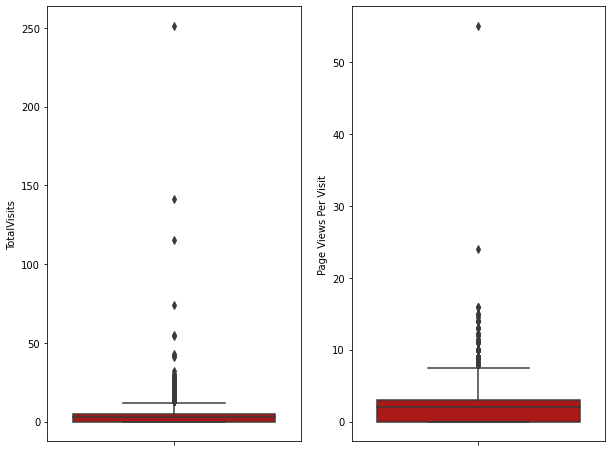

In [246]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.boxplot(data=leads,y='TotalVisits',palette='gist_heat',orient='v')

plt.subplot(1,2,2)
sns.boxplot(data=leads,y='Page Views Per Visit',palette='gist_heat',orient='v')

plt.show()


From the above boxplots we can now confirm that we have two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit'). Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will use minmax scaler to treat these ouliers in the Data Preparation Stage

###**Step 2: Data Preparation**

In [247]:
#Let's define the dependent variable y and independent variables X

#independent variables
X=leads.loc[:,leads.columns!='Converted']
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [248]:
#Dependent /target variable
y=leads.pop('Converted')
y.head(10)

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: Converted, dtype: int64

In [249]:
#let's check the correlation between the independent variable to ensure there is no multicollinearity.

X.corr()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.004322,0.033736,-0.046374,0.033445,-0.011443,-0.004322,-0.003056,-0.003056,-0.006113,-0.008088,0.095304,-0.020983,-0.017529,0.035416,-0.003056,-0.006113,0.109314,-0.017529,-0.062113,-0.004322,-0.003056,-0.051436,0.034295,-0.003056,0.050089,-0.038451,-0.010149,-0.004322,-0.003056,-0.003056,-0.003056,-0.000911,0.035416,-0.062835,0.618470,-0.043505,0.050089,-0.224090,-0.004322,-0.018744,-0.009730,-0.055143,0.082217,-0.003056,-0.017564,0.006465,0.262686,-0.007488,-0.003056,-0.009669,-0.002609,0.006225,0.042780,-0.049841,-0.004322,-0.003056,0.275213,-0.037624,0.050089,-0.188089,-0.003056,-0.003056,-0.011443,0.117259,-0.013032,0.049921,-0.003056,-0.025990,-0.010505,0.243408,-0.003056
Do Not Call,-0.004322,1.000000,0.003364,0.006801,-0.005628,-0.000573,-0.000216,-0.000153,-0.000153,-0.000306,-0.000405,-0.015587,0.023210,-0.001139,-0.000153,-0.000153,-0.000306,-0.009067,-0.001139,0.005866,-0.000216,-0.000153,-0.007125,-0.005559,-0.000153,-0.000216,0.027883,-0.001723,-0.000216,-0.000153,-0.000153,-0.000153,-0.001838,-0.000153,-0.003243,-0.002814,-0.002538,-0.000216,0.003538,-0.000216,-0.001659,-0.000840,0.018920,-0.004014,-0.000153,-0.009565,-0.001484,-0.001199,-0.000375,-0.000153,-0.000484,-0.000613,-0.002244,0.004981,-0.004232,-0.000216,-0.000153,-0.001190,-0.002032,-0.000216,-0.009769,-0.000153,-0.000153,-0.000573,0.019252,-0.002092,-0.002778,-0.000153,-0.008157,-0.000867,-0.001052,-0.000153
TotalVisits,0.033736,0.003364,1.000000,0.209468,0.517122,0.049754,0.033787,0.035721,0.014210,0.024122,0.034355,0.299552,-0.188992,-0.051979,-0.007301,0.001303,0.003683,0.102694,-0.050815,0.108810,-0.010326,0.007757,-0.304565,0.197318,-0.000848,0.017055,-0.161437,0.082466,-0.002720,0.003454,-0.002999,-0.002999,-0.082582,0.001303,-0.0680

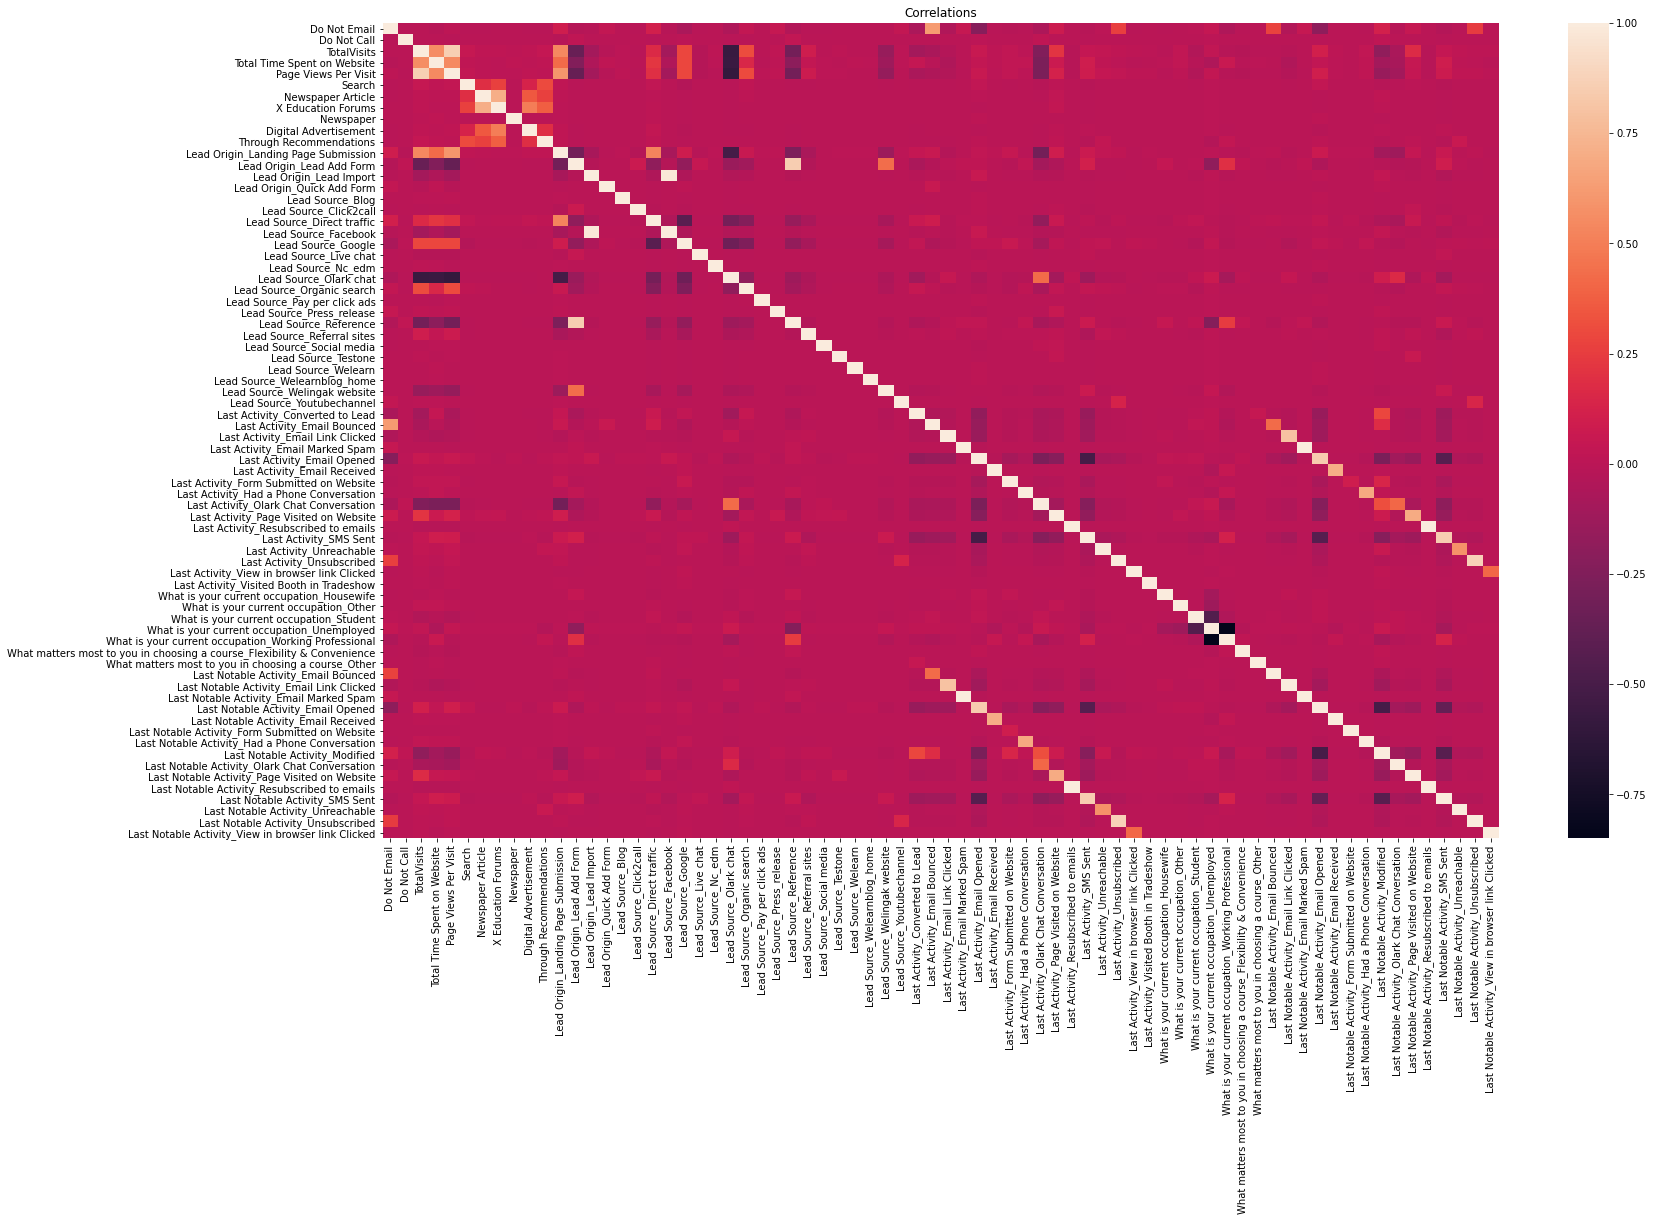

In [250]:
#Create a heat map to better understand the correlation

# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(X.corr(method='spearman'))

plt.show()

From the above heatmap, the var "Lead Source_Olark chat" has high correlation with other columns, so we will drop the column.

In [251]:
#dropping the Lead Source_Olark chat column
X=X.drop('Lead Source_Olark chat',1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


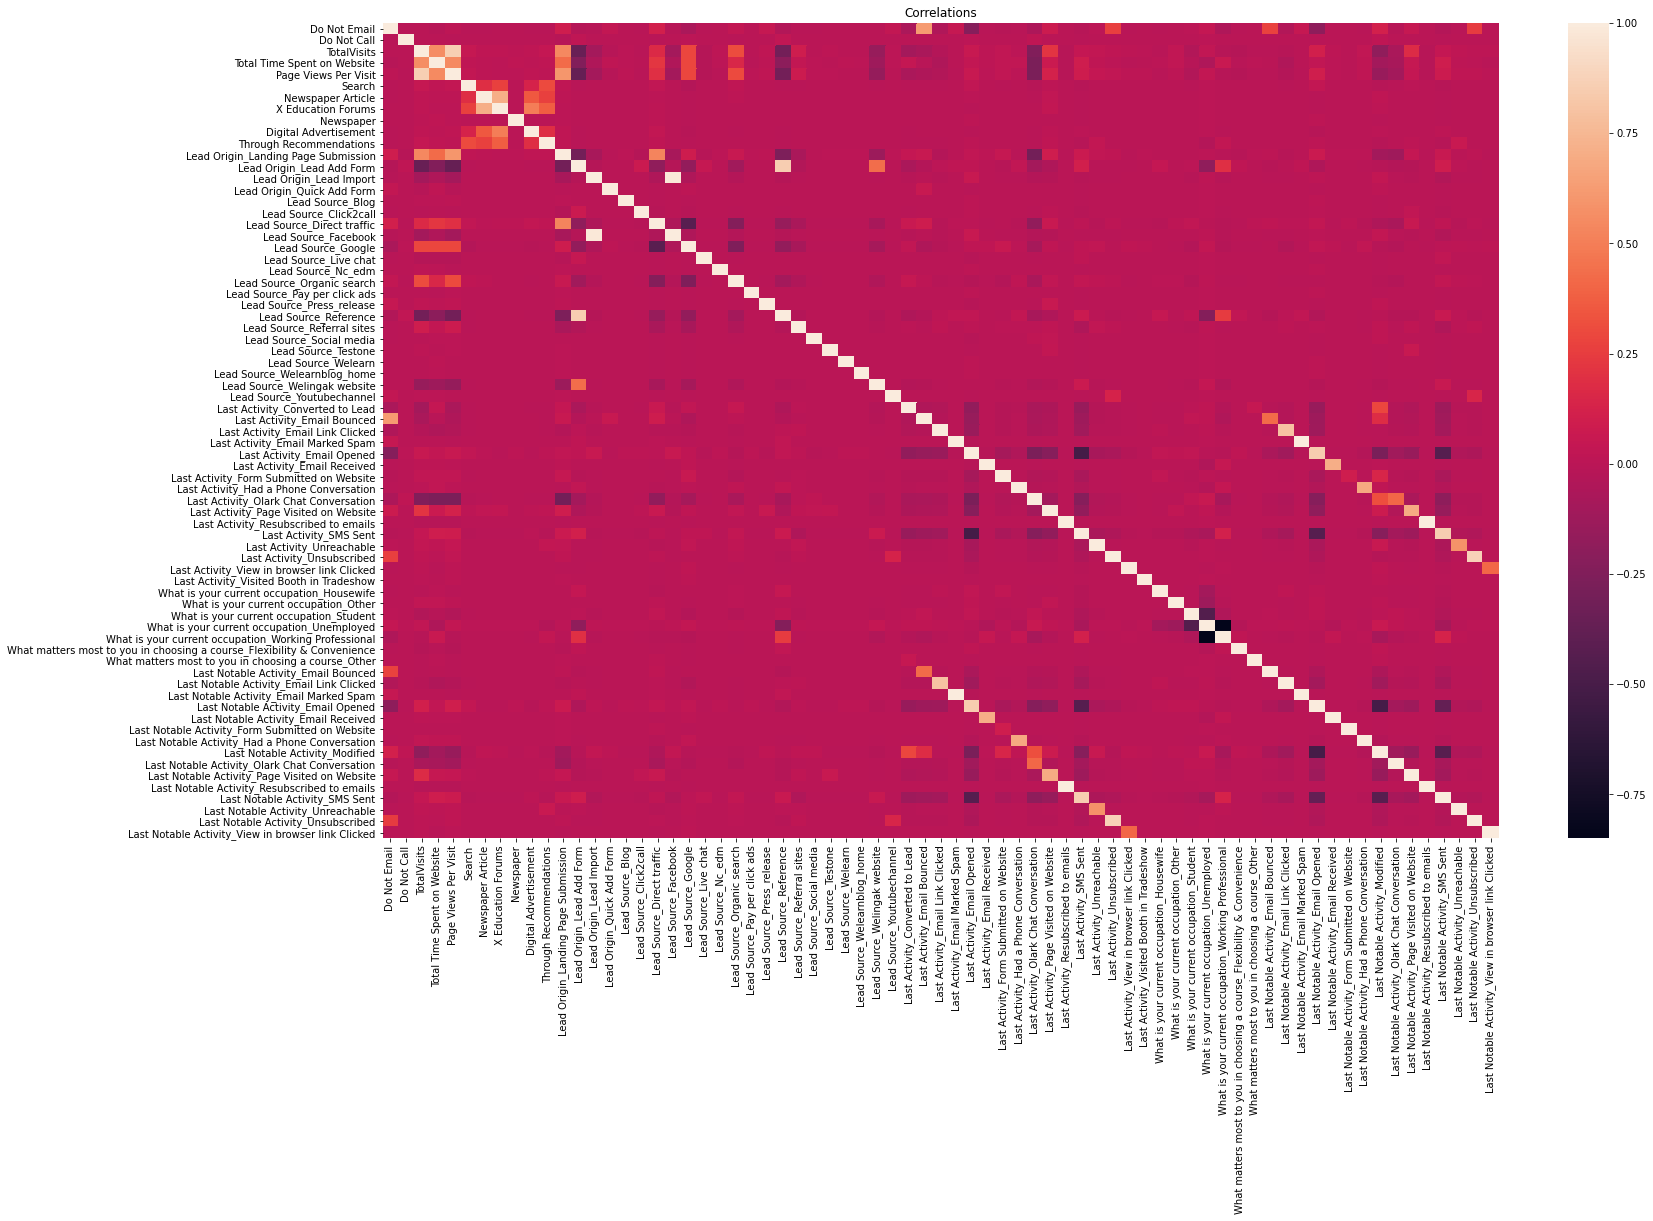

In [252]:
#Checking the correlation matrix again
#Create a heat map to better understand the correlation

# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(X.corr(method='spearman'))

plt.show()

####**Train Test Split**

In [253]:
#importing the train test split method

from sklearn.model_selection import train_test_split

In [254]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

####**Feature Scaling**

In [255]:
#importing  min =max scaler for treating the outlier as discussed at the end of Check for outliers section.

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

#We will scale only the numerical columns TotalVisits, Total Time Spent on Website , Page Views Per Visit since all the columns are in the 0-1 range/categorical
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.015936,0.214349,0.024182,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.019920,0.541373,0.090909,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [256]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,0.078386,0.000309,0.013633,0.212974,0.042130,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.528139,0.079468,0.005102,0.000155,0.000155,0.000464,0.271490,0.005102,0.320810,0.000309,0.000155,0.121058,0.000155,0.000309,0.060297,0.014224,0.000309,0.0,0.000155,0.000155,0.014069,0.000155,0.046073,0.036333,0.028293,0.000155,0.381262,0.000309,0.012678,0.003401,0.102195,0.072047,0.000155,0.300402,0.008813,0.006030,0.000773,0.000155,0.001391,0.001237,0.021027,0.897805,0.077613,0.000309,0.000155,0.006184,0.018398,0.000155,0.305349,0.000155,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,0.268799,0.017583,0.021115,0.240566,0.039668,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.499246,0.270489,0.071252,0.012434,0.012434,0.021533,0.444763,0.071252,0.466824,0.017583,0.012434,0.326219,0.012434,0.017583,0.238054,0.118422,0.017583,0.0,0.012434,0.012434,0.117786,0.012434,0.209659,0.18713

In [257]:
#Checking the target varible for class imbalance

y.sum()/len(leads)*100

38.53896103896104

We have a conversion rate of 39% So we don't have high class imbalance here. We will now proceed to build the model.

###**Step 3: Building the Model**

In [258]:
#Importing the Stats model for a detailed description of the model

import statsmodels.api as sm


In [259]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Sep 2021   Deviance:                          nan
Time:                        14:50:55   Pearson chi2:                 8.44e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    3.085e+15   3.61e+07   8.54e+07      0.000    3.09e+15    3.09e+15
Do Not Email                                                            -2.673e+13   4.43e+06  -6.04e+06      0.000   -2.67e+13   -2.67e+13
Do Not Call                                                              6.673e+15   4.75e+07    1.4e+08      0.000    6.67e+15    6.67e+15
TotalVisits                                                              1.553e+15   4.72e+07   3.29e+07      0.000    1.55e+15    1.55e+15
Total Time Spent on Website                                              2.287e+15   3.93e+06   5.82e+08      0.000    2.29e+15    2.29e+15
Page Views Per Visit                                                    -5.265e+15   3.05e+07  -1.73e+08      0.000   -5.26e+15   -5.26e+15
Search                                                                   5.806e+14    2.2e+07   2.64e+07      0.000    5.81e+14    5.81e+14
Newspaper Article                                                        4.908e+15   6.73e+07    7.3e+07      0.000    4.91e+15    4.91e+15
X Education Forums                                                      -7.871e+15   1.11e+08  -7.09e+07      0.000   -7.87e+15   -7.87e+15
Newspaper                                                               -4.516e+15   6.72e+07  -6.72e+07      0.000   -4.52e+15   -4.52e+15
Digital Advertisement                                                   -3.148e+15   4.76e+07  -6.62e+07      0.000   -3.15e+15   -3.15e+15
Through Recommendations                                                  5.778e+14   2.85e+07   2.02e+07      0.000    5.78e+14    5.78e+14
Lead Origin_Landing Page Submission                                     -1.434e+14   2.52e+06  -5.69e+07      0.000   -1.43e+14   -1.43e+14
Lead Origin_Lead Add Form                                                1.337e+15    1.3e+07   1.03e+08      0.000    1.34e+15    1.34e+15
Lead Origin_Lead Import                                                 -1.701e+15    4.8e+07  -3.54e+07      0.000    -1.7e+15    -1.7e+15
Lead Origin_Quick Add Form                                               4.745e+15   6.74e+07   7.04e+07      0.000    4.75e+15    4.75e+15
Lead Source_Blog                                                        -3.851e+15   6.72e+07  -5.73e+07      0.000   -3.85e+15   -3.85e+15
Lead Source_Click2call                                                  -3.403e+14    4.1e+07  -8.31e+06      0.000    -3.4e+14    -3.4e+14
Lead Source_Direct traffic                                               8.248e+14   3.74e+06    2.2e+08      0.000    8.25e+14    8.25e+14
Lea

From the above summary presented by generalizing linear model, we can tell that there are so many variable with insignificant p-values. Here we will use rfe for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

####**Using RFE**

In [260]:
#importing the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



In [261]:
#Running RFE for 20 Variables

#initilize the logistic regression
logreg=LogisticRegression()

#applying rfe
rfem=RFE(logreg,20)
rfem=rfem.fit(X_train,y_train) #fitting data to the model

In [262]:
X_train.columns[rfem.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct traffic', 'Lead Source_Facebook',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [263]:
#selecting the models from the rfe support and rebuilding using stats model
cols=X_train.columns[rfem.support_]
X_train_1=sm.add_constant(X_train[cols])  #adding constant

In [264]:
#creating model using the columns from RFE
logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.2
Date:                Tue, 07 Sep 2021   Deviance:                       5388.4
Time:                        14:51:03   Pearson chi2:                 7.03e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1247      0.087     -1.436      0.151      -0.295       0.045
Do Not Email                                            -1.2835      0.195     -6.576      0.000      -1.666      -0.901
TotalVisits                                              7.6217      2.258      3.375      0.001       3.195      12.048
Total Time Spent on Website                              4.1765      0.154     27.184      0.000       3.875       4.478
Page Views Per Visit                                    -8.3186      1.186     -7.013      0.000     -10.643      -5.994
Lead Origin_Lead Add Form                                3.0012      0.192     15.647      0.000       2.625       3.377
Lead Source_Direct traffic                              -0.5249      0.079     -6.627      0.000      -0.680      -0.370
Lead Source_Facebook                                    -0.6814      0.507     -1.343      0.179      -1.676       0.313
Lead Source_Referral sites                              -0.3274      0.297     -1.101      0.271      -0.910       0.256
Lead Source_Welingak website                             1.9624      0.743      2.640      0.008       0.505       3.419
Last Activity_Converted to Lead                         -1.2226      0.224     -5.463      0.000      -1.661      -0.784
Last Activity_Email Bounced                             -1.1747      0.345     -3.402      0.001      -1.851      -0.498
Last Activity_Olark Chat Conversation                   -1.0461      0.193     -5.428      0.000      -1.424      -0.668
What is your current occupation_Housewife               22.6388   1.41e+04      0.002      0.999   -2.77e+04    2.78e+04
What is your current occupation_Working Professional     2.8160      0.189     14.910      0.000       2.446       3.186
Last Notable Activity_Email Link Clicked                -1.7986      0.275     -6.542      0.000      -2.337      -1.260
Last Notable Activity_Email Opened                      -1.3264      0.087    -15.290      0.000      -1.496      -1.156
Last Notable Activity_Had a Phone Conversation           1.8413      1.109      1.660      0.097      -0.333       4.015
Last Notable Activity_Modified                          -1.7005      0.099    -17.150      0.000      -1.895      -1.506
Last Notable Activity_Olark Chat Conversation           -1.4160      0.373     -3.792      0.000      -2.148      -0.684
Last Notable Activity_Page Visited on Website           -1.8308      0.201     -9.115      0.000      -2.224      -1.437
========================================================================================================================
"""

From the above model stats, we can see the column "What is yout current occupation_Housewife" has a very high p-value, we will check the variance inflation factor and then decide to drop.

In [265]:
#importing the vif method

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [266]:
#creating the VIF function which can be recalled as long as the model is in build phase

def VIF(df):
  vif=pd.DataFrame()
  vif['Features']=df.columns
  vif['VIF']=[variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
  vif['VIF']=round(vif['VIF'],2)
  vif=vif.sort_values(by='VIF',ascending=False)
  print(vif)


In [267]:
VIF(X_train_1)

                                             Features   VIF
0                                               const  7.85
18                     Last Notable Activity_Modified  2.01
11                        Last Activity_Email Bounced  1.76
1                                        Do Not Email  1.75
12              Last Activity_Olark Chat Conversation  1.70
16                 Last Notable Activity_Email Opened  1.62
4                                Page Views Per Visit  1.55
5                           Lead Origin_Lead Add Form  1.48
2                                         TotalVisits  1.41
19      Last Notable Activity_Olark Chat Conversation  1.36
9                        Lead Source_Welingak website  1.22
10                    Last Activity_Converted to Lead  1.20
20      Last Notable Activity_Page Visited on Website  1.19
3                         Total Time Spent on Website  1.17
6                          Lead Source_Direct traffic  1.11
14  What is your current occupation_Work

As we can see, none of the columns have a high VIF, so we can be sure that there is no multicollinearity in the dataset.

We can now drop the column "What is your current occupation_Housewife" which has a high p-value. 

####**Model Tuning**

In [268]:

#Creating a new function for tuning the model

def ModelTuning(X_train,y_train,cols):
  global reg1
  global X_train_1
  X_train=X_train[cols]
  X_train_1=sm.add_constant(X_train[cols])
  logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
  reg1=logis1.fit()
  print(reg1.summary())


In [269]:
#creating the model after droppping the column
cols=cols.drop("What is your current occupation_Housewife")

#Creating the new model with updated columns
ModelTuning(X_train,y_train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.5
Date:                Tue, 07 Sep 2021   Deviance:                       5401.0
Time:                        14:51:03   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [270]:
#check VIF
VIF(X_train_1)

                                             Features   VIF
0                                               const  7.85
17                     Last Notable Activity_Modified  2.01
11                        Last Activity_Email Bounced  1.76
1                                        Do Not Email  1.75
12              Last Activity_Olark Chat Conversation  1.70
15                 Last Notable Activity_Email Opened  1.61
4                                Page Views Per Visit  1.55
5                           Lead Origin_Lead Add Form  1.47
2                                         TotalVisits  1.41
18      Last Notable Activity_Olark Chat Conversation  1.36
9                        Lead Source_Welingak website  1.22
10                    Last Activity_Converted to Lead  1.20
19      Last Notable Activity_Page Visited on Website  1.19
3                         Total Time Spent on Website  1.17
6                          Lead Source_Direct traffic  1.11
13  What is your current occupation_Work

Lead Source_Referral sites	has a high P-value and it is insignificant so we will drop the variable.

In [271]:
cols=cols.drop('Lead Source_Referral sites')

#Creating the new model with updated columns
ModelTuning(X_train,y_train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.1
Date:                Tue, 07 Sep 2021   Deviance:                       5402.3
Time:                        14:51:04   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [272]:
VIF(X_train_1)

                                             Features   VIF
0                                               const  7.85
16                     Last Notable Activity_Modified  2.00
10                        Last Activity_Email Bounced  1.76
1                                        Do Not Email  1.75
11              Last Activity_Olark Chat Conversation  1.70
14                 Last Notable Activity_Email Opened  1.61
4                                Page Views Per Visit  1.55
5                           Lead Origin_Lead Add Form  1.47
2                                         TotalVisits  1.40
17      Last Notable Activity_Olark Chat Conversation  1.36
8                        Lead Source_Welingak website  1.22
9                     Last Activity_Converted to Lead  1.20
18      Last Notable Activity_Page Visited on Website  1.19
3                         Total Time Spent on Website  1.17
6                          Lead Source_Direct traffic  1.10
12  What is your current occupation_Work

Lead Source_Facebook has a high p-value so we will drop the variable from the model

In [273]:
cols=cols.drop('Lead Source_Facebook')

#Creating the new model with updated columns
ModelTuning(X_train,y_train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.2
Date:                Tue, 07 Sep 2021   Deviance:                       5404.3
Time:                        14:51:36   Pearson chi2:                 7.05e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [274]:
VIF(X_train_1)

                                             Features   VIF
0                                               const  7.80
15                     Last Notable Activity_Modified  2.00
9                         Last Activity_Email Bounced  1.76
1                                        Do Not Email  1.75
10              Last Activity_Olark Chat Conversation  1.69
13                 Last Notable Activity_Email Opened  1.61
4                                Page Views Per Visit  1.54
5                           Lead Origin_Lead Add Form  1.47
2                                         TotalVisits  1.40
16      Last Notable Activity_Olark Chat Conversation  1.36
7                        Lead Source_Welingak website  1.22
8                     Last Activity_Converted to Lead  1.20
17      Last Notable Activity_Page Visited on Website  1.19
3                         Total Time Spent on Website  1.17
6                          Lead Source_Direct traffic  1.10
11  What is your current occupation_Work

Last Notable Activity_Had a Phone Conversation has a high p-value So we will drop the variable.

In [275]:
cols=cols.drop('Last Notable Activity_Had a Phone Conversation')

#Creating the new model with updated columns
ModelTuning(X_train,y_train,cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.1
Date:                Tue, 07 Sep 2021   Deviance:                       5408.2
Time:                        14:52:18   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [277]:
VIF(X_train_1)

                                             Features   VIF
0                                               const  7.77
14                     Last Notable Activity_Modified  1.99
9                         Last Activity_Email Bounced  1.76
1                                        Do Not Email  1.75
10              Last Activity_Olark Chat Conversation  1.69
13                 Last Notable Activity_Email Opened  1.61
4                                Page Views Per Visit  1.54
5                           Lead Origin_Lead Add Form  1.47
2                                         TotalVisits  1.40
15      Last Notable Activity_Olark Chat Conversation  1.36
7                        Lead Source_Welingak website  1.22
8                     Last Activity_Converted to Lead  1.20
16      Last Notable Activity_Page Visited on Website  1.19
3                         Total Time Spent on Website  1.17
6                          Lead Source_Direct traffic  1.10
11  What is your current occupation_Work

We do not have any other insignicant variables and the VIF is also low. We can use this final model for prediction.

###**Step 4: Prediction and Model Evaluation**

####**Model Evaluation on Training Set**

####**Predicting X_train on the trained model**

In [278]:
#predicting the train set with our final model

y_train_pred=reg1.predict(X_train_1)
y_train_pred.head()

1871    0.188563
6795    0.238918
3516    0.184376
8105    0.823200
3934    0.137304
dtype: float64

In [279]:
#Creating a new dataframe using y-train and y_train pred

y_train_pred_final=pd.DataFrame({'ID':y_train.index,'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final=y_train_pred_final.set_index('ID')
y_train_pred_final

,Converted,Converted_Prob
ID,,
1871,0,0.188563
6795,0,0.238918
3516,0,0.184376
8105,0,0.823200
3934,0,0.137304
...,...,...
350,1,0.828538
79,1,0.995025
8039,1,0.188563


####**Plotting the ROC Curve**

* ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
* The curve closer to the left side border then right side of the border is more accurate.
* The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [280]:

# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

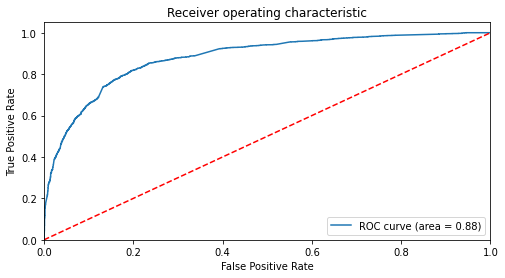

In [281]:
#calling the ROC curve function
roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

Points to be concluded from above roc curve -

* The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
* The area under the curve is 88% of the total area.

####**Find the optimal cut off**

In [282]:
#To know the right cut-off, we will use the prob range from 0 to 1 in steps of 0.1

range_n=[float(x/10) for x in range (10)] #creating range 0.1 to 0.9

for i in range_n:
  y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>i else 0) #mapping the probabilities for all possible cutoffs

y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
ID,,,,,,,,,,,,
1871,0,0.188563,1,1,0,0,0,0,0,0,0,0
6795,0,0.238918,1,1,1,0,0,0,0,0,0,0
3516,0,0.184376,1,1,0,0,0,0,0,0,0,0
8105,0,0.823200,1,1,1,1,1,1,1,1,1,0
3934,0,0.137304,1,1,0,0,0,0,0,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding 'Accuracy', 'Sensitivity' and 'Specificity' for each points.

In [283]:
#Calculate the accuracy, sensitivity and specificity for each probability cutoff

#importing the necessary library
from sklearn.metrics import confusion_matrix

eval=pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specificity'])

#using the existing 0.1 - 0.9 range

for i in range_n:
  cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
  tn,fp,fn,tp=cm_matrix.ravel()   #Finding tn-true negative, fp-false positive, fn-false negative, tp-true positive
  accuracy=(tp+tn)/(tp+tn+fp+fn)
  sensitivity=tp/(tp+fn)
  specificity=tn/(fp+tn)
  eval.loc[i]=[i,accuracy,sensitivity,specificity]

eval



,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.573129,0.974453,0.325837
0.2,0.2,0.758658,0.881995,0.682659
0.3,0.3,0.800711,0.836983,0.778361
0.4,0.4,0.813234,0.783861,0.831334
0.5,0.5,0.805195,0.671127,0.887806
0.6,0.6,0.798701,0.592052,0.926037
0.7,0.7,0.786951,0.523520,0.949275
0.8,0.8,0.758349,0.411598,0.972014
0.9,0.9,0.717069,0.274939,0.989505


Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'

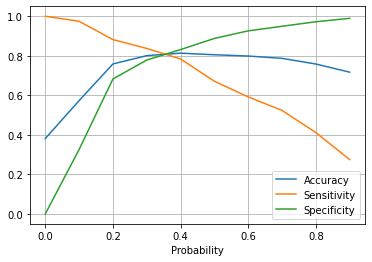

In [284]:
eval.plot.line(x='Probability',y=['Accuracy','Sensitivity','Specificity']) #line plot
plt.grid(True)  #adding grid for better clarity.
plt.show()

From the above line plot, it is clear that the optimal cutoff for the logistic regression model is **0.35.**. It balances the trade off between sensitivity and specificity.

In [285]:
#predicting the outcome with p=0.4 for the final prediction and adding as a column
y_train_pred_final['Predicted']=y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x>0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
ID,,,,,,,,,,,,,
1871,0,0.188563,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.238918,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.184376,1,1,0,0,0,0,0,0,0,0,0
8105,0,0.823200,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.137304,1,1,0,0,0,0,0,0,0,0,0


####**Precision and Recall**

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned.



In [286]:
#Create the confusion matrix using the predicted column with optimal cutoff
confusionMatrixTrain=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

PrecisionTrain = confusionMatrixTrain[1,1]/(confusionMatrixTrain[0,1]+confusionMatrixTrain[1,1])*100  # x100 for better readability
RecallTrain = confusionMatrixTrain[1,1]/(confusionMatrixTrain[1,0]+confusionMatrixTrain[1,1])*100

print("Precision= ",PrecisionTrain)
print("Recall= ",RecallTrain)

Precision=  72.09636821287306
Recall=  81.30575831305758


Important point to be noted from the outcomes for precision and recall score -

Our precison percentage is 72% approximately and recall percentage is 81%
This means we have very good model which explains relevancy of 72% and true relevant results about 81%.

**As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.**

####**Predicting X_test on the trained model**

In [287]:
#Scaling X_test data as done from X_train

#We will transform only the numerical columns TotalVisits, Total Time Spent on Website , Page Views Per Visit since all the columns are in the 0-1 range/categorical
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,0.031873,0.444982,0.145455,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0,0.019920,0.025968,0.090909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [288]:
#Retaining the same columns as X_train

X_test=X_test[cols] 

#adding constant to X_test
X_test=sm.add_constant(X_test)

#predicting X_test using model
y_test_pred=reg1.predict(X_test)

In [289]:
#Creating new dataset for the final prediction values

y_test_pred_final=pd.DataFrame({'ID':y_test_pred.index,'Converted':y_test.values,'Converted_Prob':y_test_pred.values})
y_test_pred_final=y_test_pred_final.set_index('ID')
y_test_pred_final.head()

,Converted,Converted_Prob
ID,,
4269,1,0.565083
2376,1,0.948324
7766,1,0.899659
9199,0,0.052927
4359,1,0.828538


####**Model Evaluation on Test Set**


In [290]:
#Creating the Prediction column on the final test dataframe
y_test_pred_final['Prediction']=y_test_pred_final['Converted_Prob'].apply(lambda x: 1 if x>0.35 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Prediction
ID,,,
4269,1,0.565083,1
2376,1,0.948324,1
7766,1,0.899659,1
9199,0,0.052927,0
4359,1,0.828538,1


In [291]:
#Create the confusion matrix using the predicted column with optimal cutoff
confusionMatrixTest=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Prediction)

PrecisionTest= confusionMatrixTest[1,1]/(confusionMatrixTest[0,1]+confusionMatrixTest[1,1])*100  # x100 for better readability
RecallTest = confusionMatrixTest[1,1]/(confusionMatrixTest[1,0]+confusionMatrixTest[1,1])*100

print("Precision= ",PrecisionTest)
print("Recall= ",RecallTest)

Precision=  74.13647851727043
Recall=  80.36529680365297


Our precison percentage on the test set is 74% approximately and recall percentage is 80%
This means we have very good model which explains relevancy of 74% and true relevant results about 80%.

###**Lead Score Assigning**

In [292]:
#For lead score, we can use the probability score as a measure of percentage to understand how good the lead is
#Train set score
y_train_pred_final['Lead Score']=y_train_pred_final['Converted_Prob'].apply(lambda x: round(x*100,2))
y_train_pred_final

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,Lead Score
ID,,,,,,,,,,,,,,
1871,0,0.188563,1,1,0,0,0,0,0,0,0,0,0,18.86
6795,0,0.238918,1,1,1,0,0,0,0,0,0,0,0,23.89
3516,0,0.184376,1,1,0,0,0,0,0,0,0,0,0,18.44
8105,0,0.823200,1,1,1,1,1,1,1,1,1,0,1,82.32
3934,0,0.137304,1,1,0,0,0,0,0,0,0,0,0,13.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0.828538,1,1,1,1,1,1,1,1,1,0,1,82.85
79,1,0.995025,1,1,1,1,1,1,1,1,1,1,1,99.50
8039,1,0.188563,1,1,0,0,0,0,0,0,0,0,0,18.86


In [293]:
#For lead score, we can use the probability score as a measure of percentage to understand how good the lead is
#TestSet Score
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Prob'].apply(lambda x: round(x*100,2))
y_test_pred_final

,Converted,Converted_Prob,Prediction,Lead Score
ID,,,,
4269,1,0.565083,1,56.51
2376,1,0.948324,1,94.83
7766,1,0.899659,1,89.97
9199,0,0.052927,0,5.29
4359,1,0.828538,1,82.85
...,...,...,...,...
8649,0,0.151290,0,15.13
2152,1,0.948324,1,94.83
7101,0,0.188563,0,18.86


##**Conclusion**

##**Valuable Insights** -

* The Accuracy, Precision and Recall score we got from test set in aceptable range.
* We have high recall score than precision score which we were exactly looking for.
* In business terms, this model has an ability to adjust with the company’s requirements in coming future.
* This concludes that the model is in stable state.

Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
* Last Notable Activity_Had a Phone Conversation
* Total Visits
* Total Time Spend
* What is your current occupation_Working Professional